# Exploration Data Analysis
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Loading of Dataset and Exploration Data Analysis
---

In [2]:
# Read of dataset and save training samples in train.csv and test samples in test.csv
ds=load_dataset("sapienzanlp/nlp2025_hw1_cultural_dataset")

# transform in dataframe of pandas
train_data=pd.DataFrame(ds["train"])
validation_data=pd.DataFrame(ds["validation"])


In [3]:
 #Show first 5 numbers of sample + general info of all training dataset
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item         6251 non-null   object
 1   name         6251 non-null   object
 2   description  6251 non-null   object
 3   type         6251 non-null   object
 4   category     6251 non-null   object
 5   subcategory  6251 non-null   object
 6   label        6251 non-null   object
dtypes: object(7)
memory usage: 342.0+ KB


,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q32786,916,2012 film by M. Mohanan,entity,films,film,cultural exclusive
1,http://www.wikidata.org/entity/Q371,!!!,American dance-punk band from California,entity,music,musical group,cultural representative
2,http://www.wikidata.org/entity/Q3729947,¡Soborno!,Mort & Phil comic,entity,comics and anime,comics,cultural representative
3,http://www.wikidata.org/entity/Q158611,+44,American band,entity,music,musical group,cultural representative
4,http://www.wikidata.org/entity/Q280375,1 Monk Street,"building in Monmouth, Wales",entity,architecture,building,cultural exclusive


In [4]:
#statistical description 
train_data.describe(include='all') 

,item,name,description,type,category,subcategory,label
count,6251,6251,6251,6251,6251,6251,6251
unique,6251,6245,5672,2,19,108,3
top,http://www.wikidata.org/entity/Q129298,central government,film genre,entity,politics,politician,cultural exclusive
freq,1,2,32,3924,532,99,2691


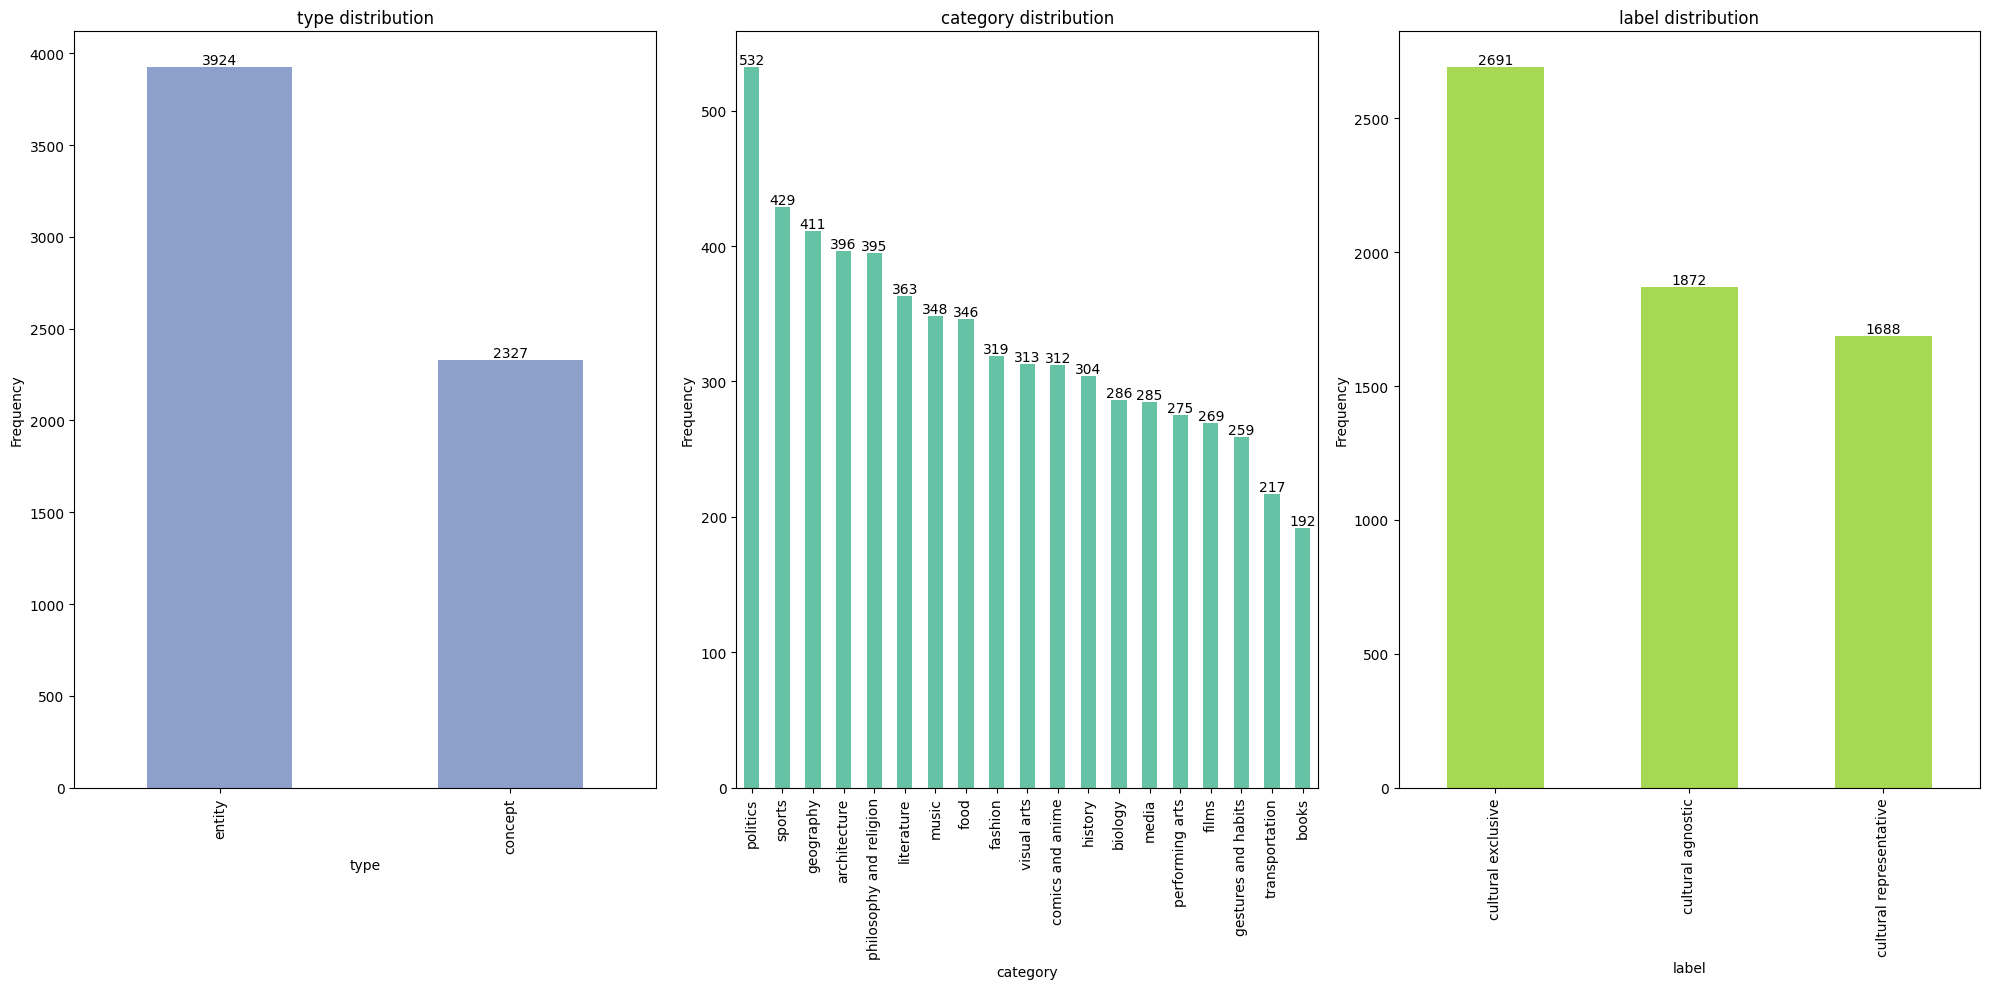

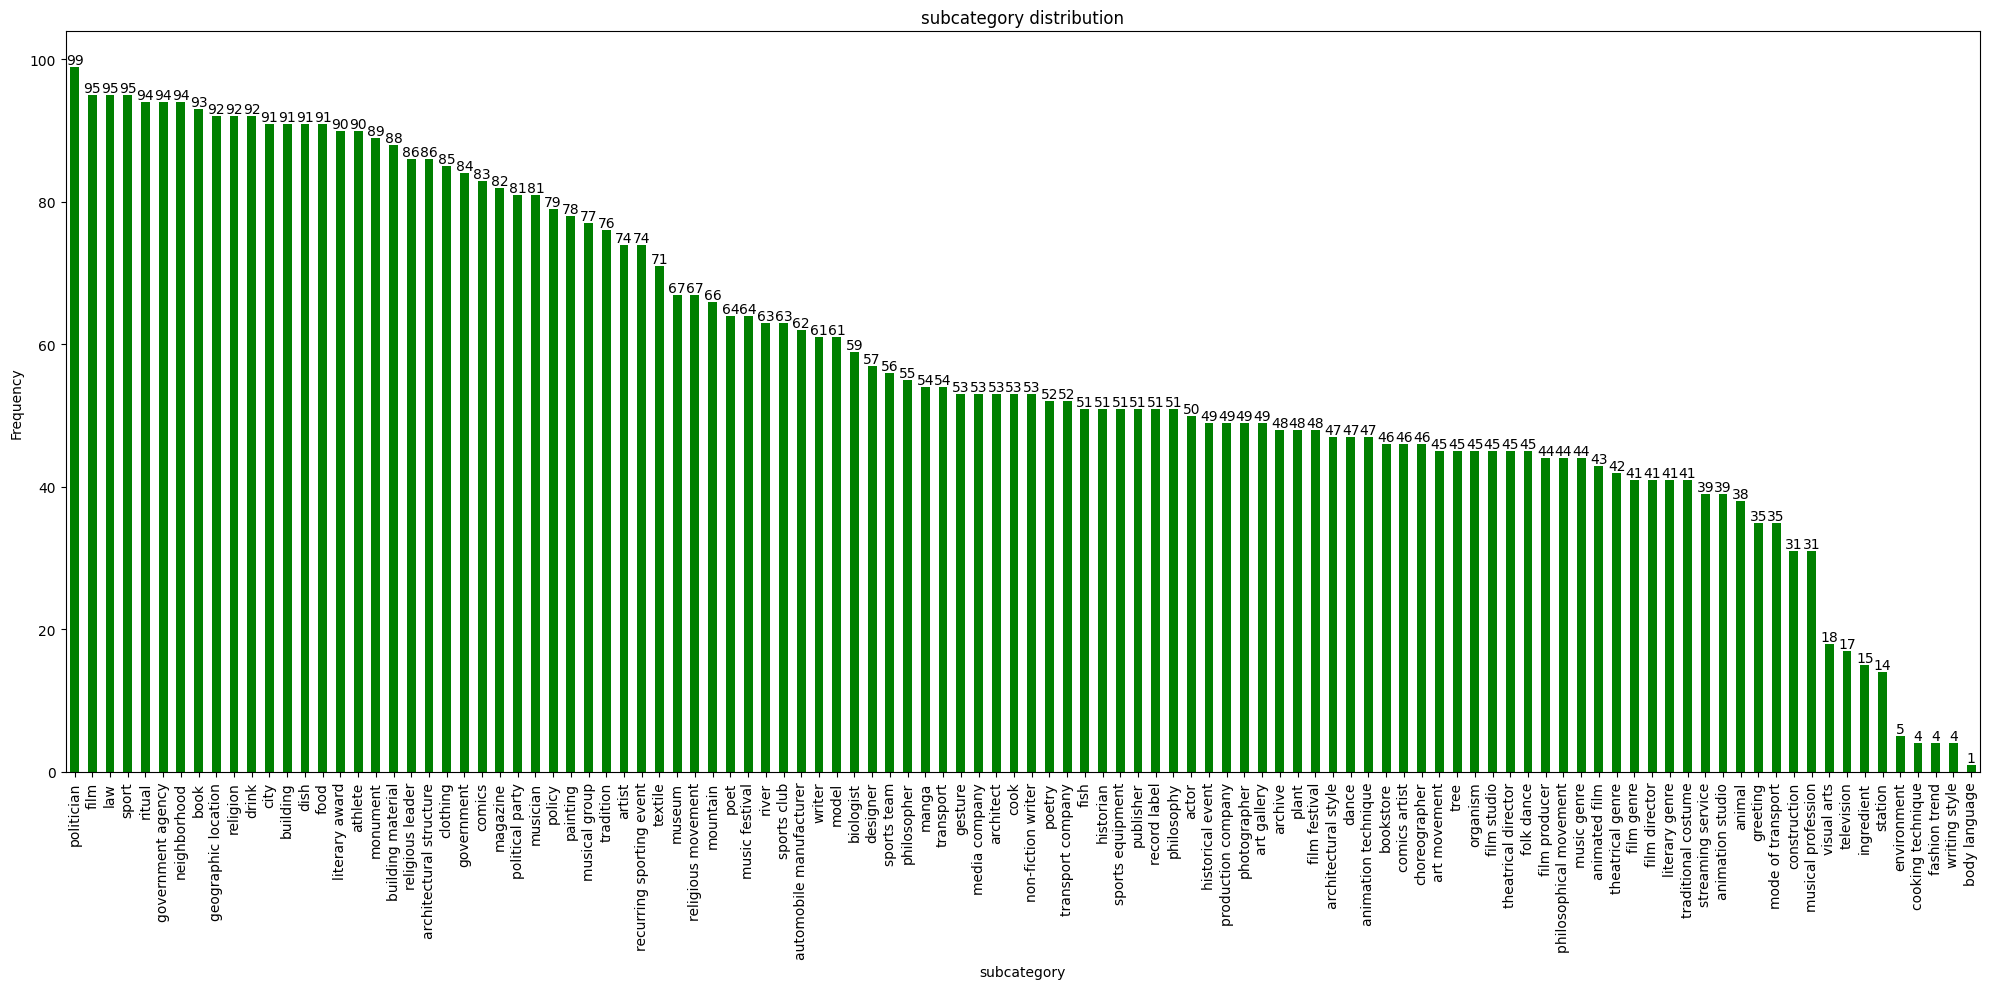

In [6]:
#histogram for all  training dataset using features:type,category,label
set_features=["type","category","label"]

#plots of number of samples which contains that value associated to type, category,label 
fig,axes=plt.subplots(1,3,figsize=(10*2,10))

axes = axes.flatten()
color_map=["#8da0cb","#66c2a5","#a6d854"]
for i,feature in enumerate(set_features):
    ax=train_data[feature].value_counts().plot(kind="bar",ax=axes[i],color=color_map[i])
    ax.bar_label(ax.containers[0]) #inserts frequency value on top of bar 
    ax.set_title(f'{feature} distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
plt.tight_layout() #adapt representation of histograms
plt.show()

#plot for feature subcategory 
plt.figure(figsize=(20, 10))  
ax=train_data["subcategory"].value_counts().plot(kind="bar",color="green")
ax.bar_label(ax.containers[0])
ax.set_title("subcategory distribution")
ax.set_xlabel("subcategory")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


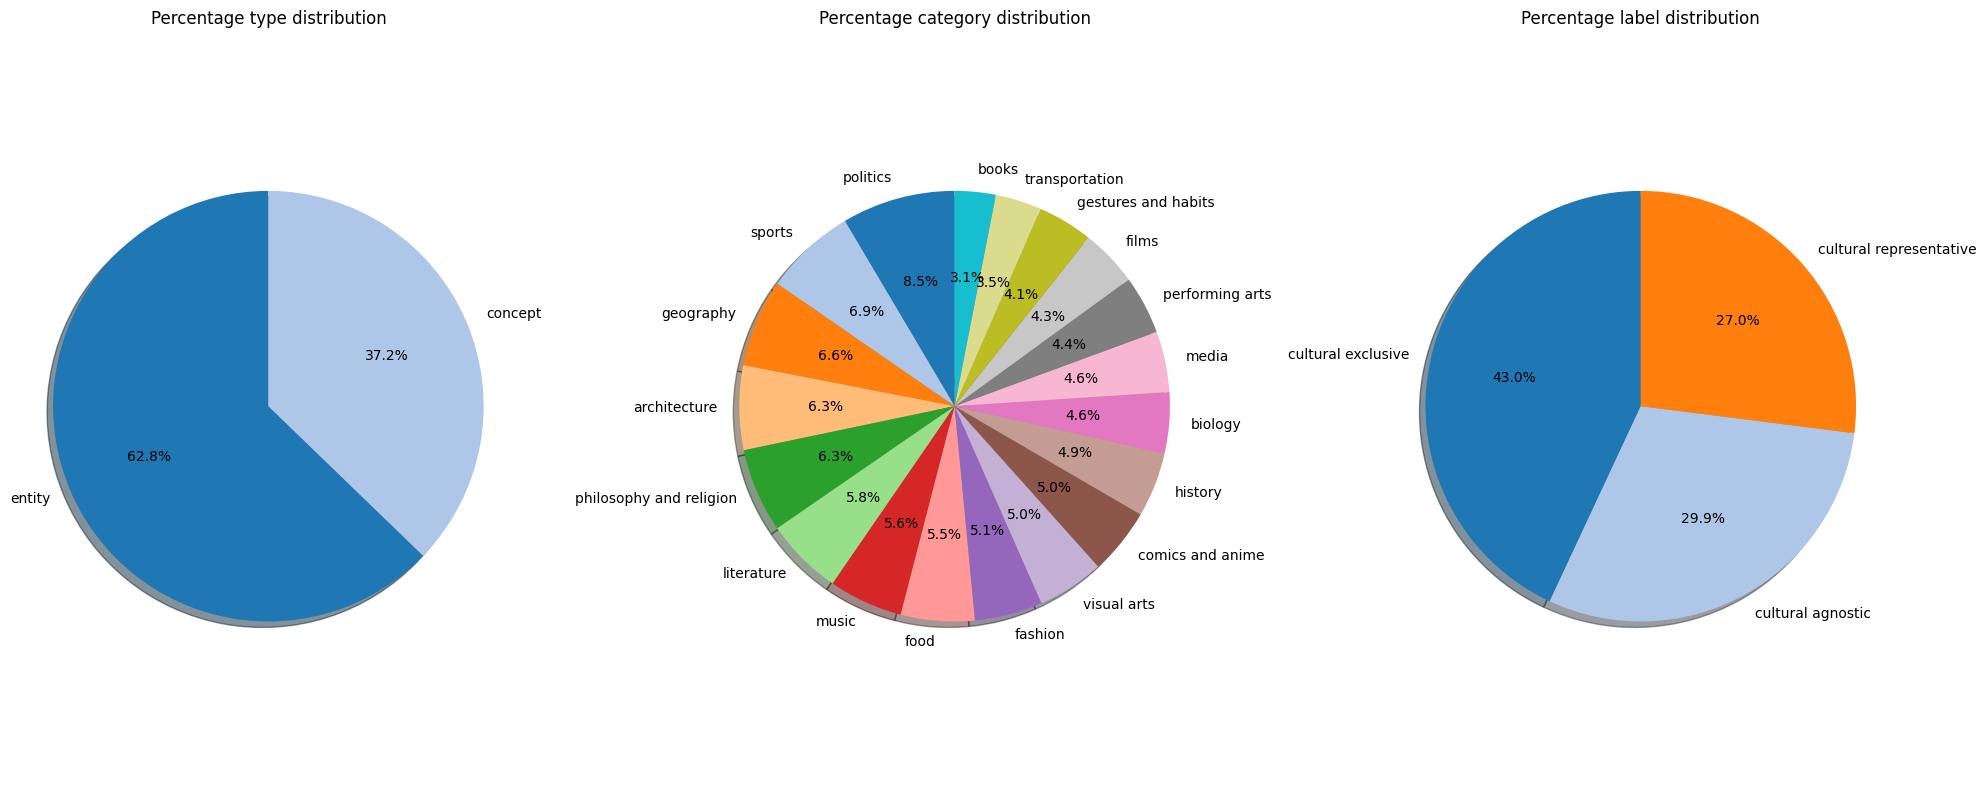

In [ ]:
# Percentage of number of examples for every category
fig,axes=plt.subplots(1,3,figsize=(10*2,8))
#colors=['']
for i,feature in enumerate(set_features): 
    percentages_feature= train_data[feature].value_counts(normalize=True) * 100
    index_category=percentages_feature.index
    values_category=percentages_feature.values
    axes[i].pie(values_category, labels=index_category, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20(range(len(index_category))),shadow=True)
    axes[i].set_title(f'Percentage {feature} distribution')
    axes[i].axis('equal')  # fix proportional circle
   
plt.tight_layout() #adapt representation of histograms
plt.show()


# Mutual information among types,category,subcategory -> Label
---
We are interested to find  which features are most related wrt to label so  we transform label,predcition 
$ $

      category  subcategory  type
0            5           34     1
1           12           64     1
2            3           23     1
3           12           64     1
4            0           18     1
...        ...          ...   ...
6246        17           13     1
6247         0            6     0
6248         7           21     1
6249        12           63     1
6250        13           98     1

[6251 rows x 3 columns]


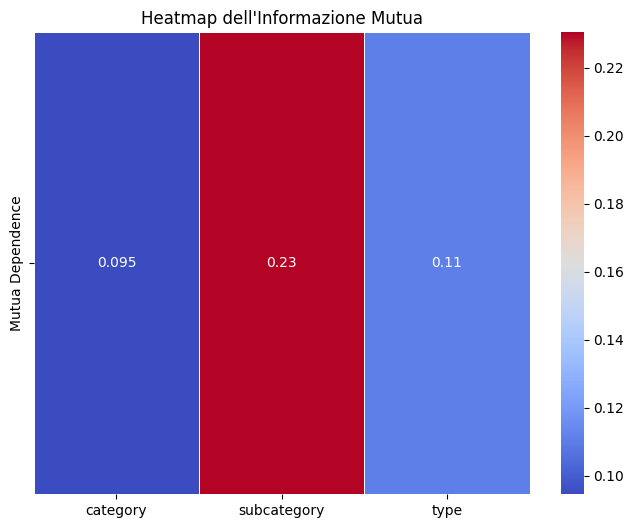

In [8]:
X_features=train_data[["category","subcategory","type"]]
y_label=train_data["label"]
encod_data=LabelEncoder()
y_encoded_label=encod_data.fit_transform(y_label) #encode y_label corresponding to C.A,C.R,C.E 
X_encoded=X_features.apply(lambda col: encod_data.fit_transform(col)) # encode x associating to 19 categories
print(X_encoded)
Mutual_info= mutual_info_classif(X_encoded, y_encoded_label) # mutual information among categories,subcategories,types and Y_
mi_matrix = pd.DataFrame(Mutual_info, index=X_encoded.columns, columns=['Mutua Dependence'])

# Crea la heatmap con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(mi_matrix.T, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Heatmap dell'Informazione Mutua")
plt.show()

## 111111